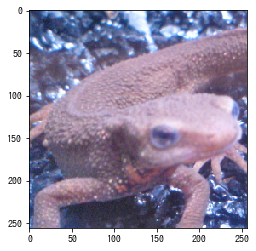

In [23]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')

plt.imshow(img)
plt.show()

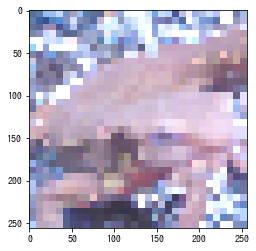

NameError: name 'out' is not defined

In [44]:
def pool_max(img, ksize_h=8, ksize_w=8):
    _img = img.copy().astype(np.float32)

    # padding
    h, w = img.shape[:2]

    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h // 2
    
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)

    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy: iy + ksize_h, ix: ix + ksize_w, ic] = _img[iy: iy + ksize_h, ix: ix + ksize_w, ic].max()

    out = out[pad_top: pad_top + h, pad_left: pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_pool = pool_max(img) # pooling

plt.imshow(img_pool)
plt.show()

TypeError: 'function' object is not subscriptable